## Etapa 1 CRISP - DM: Entendimento do negócio

Como primeira etapa do CRISP-DM, vamos entender do que se trata o negócio, e quais os objetivos. 

Este é um problema de concessão de cartões de crédito, publicado no [Kaggle](https://www.kaggle.com/), uma plataforma que promove desafios de ciência de dados, oferecendo prêmios em dinheiro para os melhores colocados. O link original está [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).  
  
Essa é uma base de proponentes de cartão de crédito, nosso objetivo é construir um modelo preditivo para identificar o risco de inadimplência (tipicamente definida pela ocorrência de um atraso maior ou igual a 90 em um horizonte de 12 meses) através de variáveis que podem ser observadas na data da avaliação do crédito (tipicamente quando o cliente solicita o cartão).

Atividades do CRISP-DM:

- **Objetivos do negócio** <br>
Note que o objetivo aqui é que o modelo sirva o mutuário (o cliente) para que avalie suas próprias decisões, e não a instituição de crédito.
- **Objetivos da modelagem** <br>
O objetivo está bem definido: desenvolver o melhor modelo preditivo de modo a auxiliar o mutuário a tomar suas próprias decisões referentes a crédito.
  
Nessa etapa também se avalia a situação da empresa/segmento/assunto de modo a se entender o tamanho do público, relevância, problemas presentes e todos os detalhes do processo gerador do fenômeno em questão, e portanto dos dados.

Também é nessa etapa que se constrói um planejamento do projeto.

## Etapa 2 Crisp-DM: Entendimento dos dados
A segunda etapa é o entendimento dos dados. Foram fornecidas 15 variáveis mais a variável resposta (em negrito na tabela). O significado de cada uma dessas variáveis se encontra na tabela.


### 2.1 Bases disponíveis
Temos duas bases importantes aqui: uma de propostas, com diversas informações dos vários solicitantes de cartão de crédito, e uma base de pagamentos. A base de pagamentos será utilizada para identificar a ocorrência de *default*. A base de propostas tem diversas informações coletadas no momento da solicitação do crédito (isto é importante: qualquer informação posterior a essa data é impossível de ser coletada na aplicação do modelo e não pode ser utilizada).

As variáveis delas são:

Base de propostas - application_record.csv

| Nome da Variável         | Description                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| ID| identificador do cliente (chave) |inteiro|
| CODE_GENDER| M = 'Masculino'; F = 'Feminino' |M/F|
| FLAG_OWN_CAR| Y = 'possui'; N = 'não possui' |Y/N|
| FLAG_OWN_REALTY| Y = 'possui'; N = 'não possui' |Y/N|
| CNT_CHILDREN| Quantidade de filhos |inteiro|
| AMT_INCOME_TOTAL| Annual income |inteiro|
| NAME_INCOME_TYPE|Tipo de renda (ex: assaliariado, autônomo etc) | texto |
| NAME_EDUCATION_TYPE| Nível de educação (ex: secundário, superior etc) |texto|
| NAME_FAMILY_STATUS | Estado civil (ex: solteiro, casado etc)| texto |
| NAME_HOUSING_TYPE | tipo de residência (ex: casa/apartamento, com os pais etc) | texto |
| DAYS_BIRTH | Count backwards from current day (0), -1 means yesterday |inteiro|
| DAYS_EMPLOYED | Count backwards from current day (0), -1 means yesterday |inteiro|
| FLAG_MOBIL | Indica se possui celular (1 = sim, 0 = não) |binária|
| FLAG_WORK_PHONE | Indica se possui telefone comercial (1 = sim, 0 = não) |binária|
| FLAG_PHONE | Indica se possui telefone (1 = sim, 0 = não) |binária|
| FLAG_EMAIL | Indica se possui e-mail (1 = sim, 0 = não) |binária|
| OCCUPATION_TYPE | Occupation	 |Qualitativa|
| CNT_FAM_MEMBERS | quantidade de pessoas na residência |inteiro|

Base de pagamentos - credit_record.csv  

| Nome da Variável         | Description                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| ID| identificador do cliente (chave) |inteiro|
| mes_00 a mes_24| faixa de atraso mês a mês do cliente <br>0: 1-29 days past due &nbsp;&nbsp;&nbsp;&nbsp; 1: 30-59 days past due <br />2: 60-89 days overdue &nbsp;&nbsp;&nbsp;&nbsp; 3: 90-119 days overdue <br /> 4: 120-149 days overdue &nbsp;&nbsp;&nbsp;&nbsp; 5: more than 150 days <br />C: paid off that month &nbsp;&nbsp;&nbsp;&nbsp; X: No loan for the month |Qualitativa|



#### 2.1.1 Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

#### 2.1.2 Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [2]:
#Carregando a base de dados
application = pd.read_csv('application_record.csv')
credit = pd.read_csv('credit_record.csv')

In [3]:
#Base de propostas-base larga
application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
#Base de pagamentos-base longa
credit.head(10)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


#### 2.1.3 Base larga vs base longa
A base ser larga significa que há uma linha para cada cliente, e que as informações estarão nas colunas, em contraste com a 'base longa', em que haveria uma linha para cada combinação cliente/mês, uma coluna indicando o cliente, outra indicando o mês, e apenas uma coluna com a informação do atraso.

In [5]:
#Pivoteando a base de pagamentos para se tornar um base larga
pg = credit.pivot(index = 'ID', columns = 'MONTHS_BALANCE', values = 'STATUS')
pg.head(10)

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,-9,-8,-7,-6,-5,-4,-3,-2,-1,0
ID,,,,,,,,,,,,,,,,,,,,,
5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,X
5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,C,C,C,C,C,C,C,C,C
5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,X,X
5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,X,X
5001715,NaN,X,X,X,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,X
5001717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,C,C,C,C,C
5001718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,1,0,0,0,0,0,C,C,C
5001719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,C,C,C,C,C,C,C,C,C,C
5001720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,1,0,1,1,0,0,1


### 2.2 Construindo variável resposta

Nas etapas que se seguem vamos montar a variável resposta da base do nosso projeto para classificação de risco de crédito.

#### Marcação de bom e mau
O objetivo da modelagem é classificar o risco de inadimplência, ou como se diz no meio, o risco de *default*. Podemos fazer longas discussões sobre o conceito de *default* com base em estudos e exigências regulatórias, para efeitos deste estudo, um cliente em *default* é aquele que está em 60 dias de atraso ou mais. Então classificaremos os clientes como 'bons' e 'maus' assim:
- **Maus** pagadores: são aqueles que entraram em 'default' (atraso 60 dias ou mais) nos 24 meses seguintes à aquisição do cartão de crédito. 
- **Bons** pagadores: são considerados todos os demais.
- **Excluídos**: Clientes que não adquiriram um cartão de crédito (seja por recusa, seja por desistência) não possuem informações de pagamento, portanto não se pode identificar se são bons ou maus. Há uma longa discussão e literatura sobre *inferência de rejeitados* que está fora do escopo deste exercício.


#### Construindo a variável resposta
A base de pagamentos está em um formato de 'base larga'. Essa base possui informações de pagamentos do cliente mês a mês a partir do mês de aquisição do crédito (mês 0) até o sexagésimo mês após a aquisição do crédito (mês -60). Utilizaremos essa base para determinar se um proponente é considerado 'bom pagador' ou caso apresente atraso representativo, será considerado 'mau pagador'.

#### 2.2.1 Parte 1. Marcar *default* no mês
Fazendo uma indicadora de se o cliente está em *default* em cada uma das marcações (mes_00 a mes_60). Para tanto, será utilizado o método `.isin()` do Pandas. A seguinte [documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html) pode ser consultada, caso necessário.

In [6]:
# Criando Data Frame que indica se o cliente está em default para cada um dos meses
df_cliente_default_mes = pg.isin(['2', '3', '4', '5'])
df_cliente_default_mes.head()

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,-9,-8,-7,-6,-5,-4,-3,-2,-1,0
ID,,,,,,,,,,,,,,,,,,,,,
5001711,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5001712,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5001713,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5001714,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5001715,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### 2.2.2 Parte 2. 'bons' e 'maus' ao longo de todos os 24 meses de desempenho
Marcando para cada cliente se ele teve pelo menos um episódio de *default* entre o mês 0 e o mês 60, usando o método `sum()`. Mais informações podem ser encontradas na [documentação](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html). Tendo o número de meses em default de cada cliente, basta marcar `True` para todos aqueles que possuem **pelo menos 1 mês** em *default* e `False` para os demais.

In [7]:
# Criando coluna 'default' que indica se o cliente esteve em default em pelo menos um dos 60 meses 
num_meses_em_default = df_cliente_default_mes.sum(axis = 1) #Nº meses em default para cada cliente 
pg['DEFAULT'] = (num_meses_em_default > 0).values
pg.head(10)

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,-8,-7,-6,-5,-4,-3,-2,-1,0,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,0,X,False
5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,C,C,C,C,C,C,C,C,C,False
5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,X,False
5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,X,False
5001715,NaN,X,X,X,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,False
5001717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,C,C,C,C,C,False
5001718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,C,C,C,False
5001719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,C,C,C,C,C,C,C,C,C,False
5001720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,1,0,1,1,0,0,1,False


In [8]:
#Exibindo o nº de clientes que estão (True) ou não (False) em default
pg['DEFAULT'].value_counts()

False    45318
True       667
Name: DEFAULT, dtype: int64

In [9]:
#Exibindo o número de clientes de acordo com o nº de meses que estavam em default
pd.DataFrame(
    num_meses_em_default.value_counts(),
    columns = ['Nº de clientes']) \
  .sort_index() \
  .rename_axis('Nº meses em default')

,Nº de clientes
Nº meses em default,
0,45318
1,274
2,108
3,68
4,38
5,25
6,25
7,11
8,20


#### 2.2.3 Parte 3. Marcando proponentes expostos ao risco de crédito
Marcando proponentes que se tornaram tomadores: lembre-se de que clientes que não adquiriram o cartão devem ser desconsiderados. A base de pagamentos possui apenas clientes que adquiriram cartão de crédito, então serão selecionados somente os clientes da base de propostas que se encontram na base de pagamentos.

#### 2.2.4 Parte 4. Consolidando as informações
Nesta etapa, será feita junção das informações da base de propostas com a variável de *default* que acabou de ser construída. A etapas 3 e etapa 4 foram realizadas em uma única linha de código ;)

In [10]:
#Junção da base de propostas e base de pagamentos
#Usando o método inner join, selecionamos apenas os dados dos proponentes que adquiriram cartão de crédito
application = application.merge(pg['DEFAULT'], on = 'ID', how = 'inner')
application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DEFAULT
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,False
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,False
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,False
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,False
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,False


#### 2.2.5 Parte 5. Verificando
Será feita uma contagem dos valores do *default* que foi construída.

In [11]:
#Contagem dos valores da coluna 'default' para a novo Data Frame
application['DEFAULT'].value_counts()

False    35841
True       616
Name: DEFAULT, dtype: int64

In [12]:
#Distribuição percentual da variável target
application['DEFAULT'].value_counts(normalize = True)

False    0.983103
True     0.016897
Name: DEFAULT, dtype: float64

In [13]:
#Avaliando as variáveis
application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [14]:
application[['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS']].describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_EMPLOYED,CNT_FAM_MEMBERS
count,36457.000000,3.645700e+04,36457.000000,36457.000000
mean,0.430315,1.866857e+05,59262.935568,2.198453
std,0.742367,1.017892e+05,137651.334859,0.911686
min,0.000000,2.700000e+04,-15713.000000,1.000000
25%,0.000000,1.215000e+05,-3153.000000,2.000000
50%,0.000000,1.575000e+05,-1552.000000,2.000000
75%,1.000000,2.250000e+05,-408.000000,3.000000
max,19.000000,1.575000e+06,365243.000000,20.000000


In [15]:
#Qtde de missings em cada variável
application.isna().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
DEFAULT                    0
dtype: int64

In [16]:
application.OCCUPATION_TYPE.nunique()

18

In [17]:
#Removendo coluna que indica tipo de ocupação, para simplificação do modelo
application.drop(columns = 'OCCUPATION_TYPE', inplace = True)

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:
- seleção
Neste caso, os dados já estão pré-selecionados
- limpeza
Precisaremos identificar e tratar dados faltantes
- construção
Neste primeiro exercício não faremos construção de novas variáveis
- integração
Temos apenas uma fonte de dados, não é necessário agregação
- formatação
Os dados já se encontram em formatos úteis

Os dados já estão pré-selecionados, construídos e integrados, mas há dados faltantes que serão eliminados na próxima célula

### 3.1 Montagem de um metadados

#### 3.1.1 Parte 1.Criando um dataframe com os nomes de cada variável e o tipo de dados de cada variável.


In [18]:
tipo_de_dados = []
d_types = list(map(str, application.dtypes))

for tipos in d_types:
    if tipos == "object":
        tipo_de_dados.append('string')
    if tipos == "int64":
        tipo_de_dados.append('inteiro')
    if tipos == "float64":
        tipo_de_dados.append('float')
    if tipos == "bool":
        tipo_de_dados.append('booleano')
tipo_de_dados

['inteiro',
 'string',
 'string',
 'string',
 'inteiro',
 'float',
 'string',
 'string',
 'string',
 'string',
 'inteiro',
 'inteiro',
 'inteiro',
 'inteiro',
 'inteiro',
 'inteiro',
 'float',
 'booleano']

#### 3.1.2 Parte 2. Adicionando uma coluna nesse *dataframe* chamada `qtd_categoria` e coloque nela o número de categorias correspondente de cada variável.

In [19]:
colunas = application.columns
#iniciando uma lista vazia
qtd_categorias = []
#fazendo um for ao longo dos nomes das variáveis
for coluna in colunas:
    #contagem do número de categorias dessa variável
    n = application[coluna].nunique()
    #acumulando na lista criada
    qtd_categorias.append(n)
qtd_categorias

[36457, 2, 2, 2, 9, 265, 5, 5, 5, 6, 7183, 3640, 1, 2, 2, 2, 10, 2]

In [20]:
d = {'colunas': colunas, 'tipo-de_dados': tipo_de_dados, 'qtd_categorias': qtd_categorias}
df = pd.DataFrame(data = d)
df

,colunas,tipo-de_dados,qtd_categorias
0,ID,inteiro,36457
1,CODE_GENDER,string,2
2,FLAG_OWN_CAR,string,2
3,FLAG_OWN_REALTY,string,2
4,CNT_CHILDREN,inteiro,9
5,AMT_INCOME_TOTAL,float,265
6,NAME_INCOME_TYPE,string,5
7,NAME_EDUCATION_TYPE,string,5
8,NAME_FAMILY_STATUS,string,5
9,NAME_HOUSING_TYPE,string,6


### 3.2 Tratamento dos dados

Nessa fase do projeto, deverás ser criado um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - eliminando as variáveis tipo *str*, mantendo apenas suas versões *dummy*. As variáveis dummy serão criadas para aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. 

In [21]:
application_encode = application
application_encode.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,DEFAULT
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,False
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,False
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0,False
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,False
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,False


#### 3.2.1 Parte 1. Atribuindo valores inteiros {0, 1} para dados categorizados com apenas duas categorias


* Variável **sexo**


In [22]:
print(application_encode['CODE_GENDER' ].unique())

application_encode['CODE_GENDER'] = application_encode['CODE_GENDER'].map({'M': 1, 'F': 0})
application_encode['CODE_GENDER' ].unique()

['M' 'F']


array([1, 0], dtype=int64)

* Variável **posse_de_veiculo**

In [23]:
print(application_encode['FLAG_OWN_CAR'].unique())

application_encode['FLAG_OWN_CAR'] = application_encode['FLAG_OWN_CAR'].map({'Y': 1, 'N': 0})
application_encode['FLAG_OWN_CAR'].unique()

['Y' 'N']


array([1, 0], dtype=int64)

* Variável **posse_de_imovel**


In [24]:
print(application_encode['FLAG_OWN_REALTY'].unique())

application_encode['FLAG_OWN_REALTY'] = application_encode['FLAG_OWN_REALTY'].map({'Y': 1, 'N': 0})
application_encode['FLAG_OWN_REALTY'].unique()

['Y' 'N']


array([1, 0], dtype=int64)

#### 3.2.2 Parte 2. Mudando tipo de dados booleanos para inteiro

In [25]:
application_encode['DEFAULT'] = application_encode['DEFAULT'].astype(int)

#### 3.2.3 Parte 3. Mudando dados do tipo float que decrevem qtdes inteiras para tipo apropriado

In [26]:
#Convertendo dias para anos
application_encode['DAYS_EMPLOYED'] = application_encode['DAYS_EMPLOYED']/365
application_encode['DAYS_BIRTH'] = application_encode['DAYS_BIRTH']/365

In [27]:
#Renomeando colunas após conversão
application_encode.rename(columns = {'DAYS_EMPLOYED': 'YEARS_EMPLOYED', 'DAYS_BIRTH': 'AGE'}, inplace = True)

In [28]:
#Convertendo para tipo inteiro
application_encode['CNT_FAM_MEMBERS'] = application_encode['CNT_FAM_MEMBERS'].astype(int)
application_encode['YEARS_EMPLOYED'] = application_encode['YEARS_EMPLOYED'].astype(int)
application_encode['AGE'] = application_encode['AGE'].astype(int)

In [29]:
application_encode.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,DEFAULT
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-32,-12,1,1,0,0,2,0
1,5008805,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-32,-12,1,1,0,0,2,0
2,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-58,-3,1,0,0,0,2,0
3,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-52,-8,1,0,1,1,1,0
4,5008809,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-52,-8,1,0,1,1,1,0


In [30]:
application_encode.dtypes

ID                       int64
CODE_GENDER              int64
FLAG_OWN_CAR             int64
FLAG_OWN_REALTY          int64
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
AGE                      int32
YEARS_EMPLOYED           int32
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
CNT_FAM_MEMBERS          int32
DEFAULT                  int32
dtype: object

#### 3.2.4 Parte 4. Transformando dados categóricos com mais de duas categorias em dummies

In [31]:
application_encode = pd.get_dummies(application, 
                                    columns = ['NAME_INCOME_TYPE',
                                               'NAME_EDUCATION_TYPE',
                                               'NAME_FAMILY_STATUS',
                                               'NAME_HOUSING_TYPE',],
                                    drop_first = True)
application_encode.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,...,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,5008804,1,1,1,0,427500.0,-32,-12,1,1,...,0,0,0,0,0,0,0,0,1,0
1,5008805,1,1,1,0,427500.0,-32,-12,1,1,...,0,0,0,0,0,0,0,0,1,0
2,5008806,1,1,1,0,112500.0,-58,-3,1,0,...,1,1,0,0,0,1,0,0,0,0
3,5008808,0,0,1,0,270000.0,-52,-8,1,0,...,1,0,0,1,0,1,0,0,0,0
4,5008809,0,0,1,0,270000.0,-52,-8,1,0,...,1,0,0,1,0,1,0,0,0,0
5,5008810,0,0,1,0,270000.0,-52,-8,1,0,...,1,0,0,1,0,1,0,0,0,0
6,5008811,0,0,1,0,270000.0,-52,-8,1,0,...,1,0,0,1,0,1,0,0,0,0
7,5008812,0,0,1,0,283500.0,-61,1000,1,0,...,0,0,1,0,0,1,0,0,0,0
8,5008813,0,0,1,0,283500.0,-61,1000,1,0,...,0,0,1,0,0,1,0,0,0,0
9,5008814,0,0,1,0,283500.0,-61,1000,1,0,...,0,0,1,0,0,1,0,0,0,0


---

#### 3.2.5 Qual variável é mais poderosa?

Considerando as variáveis `possui_email` e `posse_de_veiculo`, qual delas parece mais poderosa para prever a probabilidade de `DEFAULT = 1`?

In [32]:
tab_cruzada = pd.crosstab([application_encode['FLAG_OWN_CAR'], 
                           application_encode['FLAG_EMAIL']],
                           application_encode['DEFAULT'],
                           normalize = 'columns')
tab_cruzada.style.format('{:.2%}')

Dentre aqueles considerados maus pagadores, cerca de 62% desse grupo não possuem carro. No entanto, cerca de 92% dos aplicantes dentro desse grupo não possuem e-mail. Isso significa que o fato de o aplicante não possuir e-mail, torna-o mais provável de ser um mau pagador do que se considerássemos o fato dele não possuir um carro. Uma justificativa plausível é que o e-mail pode ser utilizado como um dos meios de cobrança dos bancos. O atraso ou o não recebimento da fatura por correspondência (mudança de endereço, extravio, etc.) poderia implicar em atrasos no seu pagamento.

---

#### 3.2.6 Parte 5. Salvando a base com os dados tratados.

In [33]:
application_encode.to_csv("application_encode.csv", index = False)

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
Utilizaremos a técnica de floresta aleatória (**random forest**), pois é uma técnica bastante versátil e robusta que captura bem padrões complexos nos dados, relativamente fácil de se usar e que costuma produzir excelentes resultados para uma classificação como estas. Vamos ver esse algoritmo em detalhes mais adiante no curso, mas pense nele por enquanto como uma regra complexa baseada nas variáveis explicativas que classifica o indivíduo como inadimplente ou não. Mais adiante no curso vamos extrair mais dessa técnica.
- Desenho do teste
Antes de rodar o modelo precisamos construir um desenho do teste que será realizado. Para desenvolver um modelo como este, é considerado uma boa prática dividir a base em duas, uma chamada ```treinamento```, onde o algoritmo 'aprende', e outra chamada ```teste```, onde o algoritmo é avaliado. Essa prática fornece uma métrica de avaliação mais fidedigna do algoritmo, falaremos mais detalhes em lições futuras.
- Avaliação do modelo
Faremos a avaliação do nosso modelo através do percentual de acerto, avaliando a classificação do modelo (inadimplente e não inadimplente) e comparando com o estado real armazenado na variável resposta (```AtrasoRelevante2anos```). Esse percentual de acerto é frequentemente chamado de acurácia (**obs:** nunca usar assertividade... a**ss**ertivo não é aquele que a**c**erta, e sim "*adj.: em que o locutor declara algo, positivo ou negativo, do qual assume inteiramente a validade; declarativo*." a**C**ertivo está errado ;)


### 4.1 Dividindo a base em treino e teste

Separando 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta `mau` e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [34]:
#Carregando a base e garantindo que está como deveria.
application_encode = pd.read_csv("application_encode.csv")
application_encode.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,...,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,5008804,1,1,1,0,427500.0,-32,-12,1,1,...,0,0,0,0,0,0,0,0,1,0
1,5008805,1,1,1,0,427500.0,-32,-12,1,1,...,0,0,0,0,0,0,0,0,1,0
2,5008806,1,1,1,0,112500.0,-58,-3,1,0,...,1,1,0,0,0,1,0,0,0,0
3,5008808,0,0,1,0,270000.0,-52,-8,1,0,...,1,0,0,1,0,1,0,0,0,0
4,5008809,0,0,1,0,270000.0,-52,-8,1,0,...,1,0,0,1,0,1,0,0,0,0


In [35]:
#Armazenando as variáveis explicativas
x = application_encode.drop('DEFAULT', axis = 1)
#Armazenando a variável target
y = application_encode['DEFAULT']

In [36]:
#Separando as base de dados para treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 50)

### 4.2 Técnica de pós-poda (*post prunning*) parametrizada pelo ccp_alpha

In [37]:
clf = DecisionTreeClassifier(random_state = 50)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas

In [38]:
#Criando uma lista de árvores de decisão para diferentes parâmetros de ccp_alpha
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state = 50, ccp_alpha = ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

In [39]:
#DataFrame da acurácia de treino e teste para diferentes valores de ccp_alpha 
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

clf_scores = pd.DataFrame({'alpha': ccp_alphas, 'train_score': train_scores, 'test_score': test_scores})
clf_scores.set_index('alpha', inplace = True)
clf_scores

,train_score,test_score
alpha,,
0.000000,1.000000,0.974858
0.000016,0.999961,0.974767
0.000016,0.999922,0.974767
0.000019,0.999882,0.974858
0.000019,0.999843,0.974950
...,...,...
0.000080,0.984443,0.982629
0.000094,0.984286,0.982812
0.000095,0.983738,0.982721


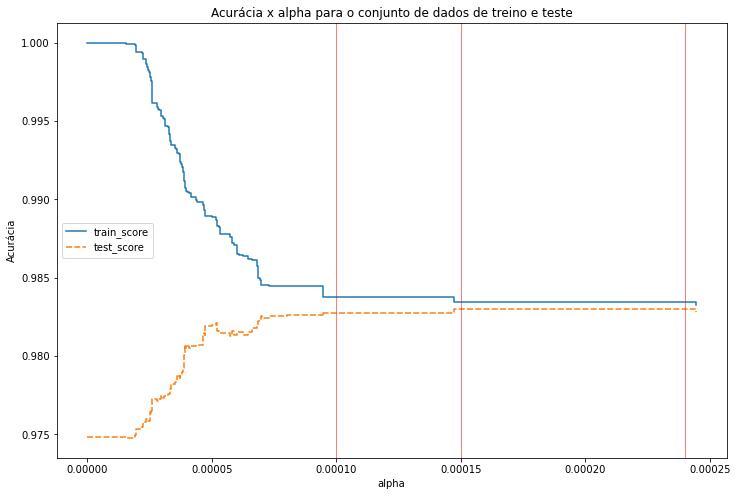

In [40]:
#Potagem da acurácia x alpha para o conjunto de dados de treino e teste
fig, ax = plt.subplots(figsize = (12, 8))
sns.lineplot(data = clf_scores, drawstyle = 'steps-post')
ax.set_ylabel('Acurácia')
ax.set_title('Acurácia x alpha para o conjunto de dados de treino e teste')
ax.axvline(x = 0.00010, alpha = 0.5, color = 'r', linewidth = 1)
ax.axvline(x = 0.00015, alpha = 0.5, color = 'r', linewidth = 1)
ax.axvline(x = 0.00024, alpha = 0.5, color = 'r', linewidth = 1);

In [41]:
#Escolhendo um valor ideal para alpha para acurácia do teste e do treino
clf_scores.loc[0.00010:0.00025, :]

,train_score,test_score
alpha,,
0.000147,0.983463,0.982995
0.000245,0.983228,0.982812


### 4.3 Treinamento do Modelo - Árvores de decisão para diferente valores de ccp_alpha

#### 4.3.1 Modelo 1 - Menor valor de alpha que maximiza a acurácia do teste 

In [42]:
#Criando uma árvore de decisão para ccp_alpha igual a 0.000147
clf_podada_1 = DecisionTreeClassifier(random_state = 50, ccp_alpha = 0.000147)
clf_podada_1 = clf_podada_1.fit(x_train, y_train)

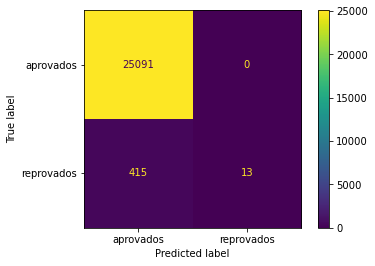

In [43]:
#Visualização da matriz de confusão para o Modelo 1
plot_confusion_matrix(clf_podada_1, x_train, y_train, display_labels = ['aprovados', 'reprovados']);

In [44]:
#Acurácia na base de treinamento para o Modelo 1
y_hat_train = clf_podada_1.predict(x_train)
accuracy_score(y_train, y_hat_train)

0.9837376072730123

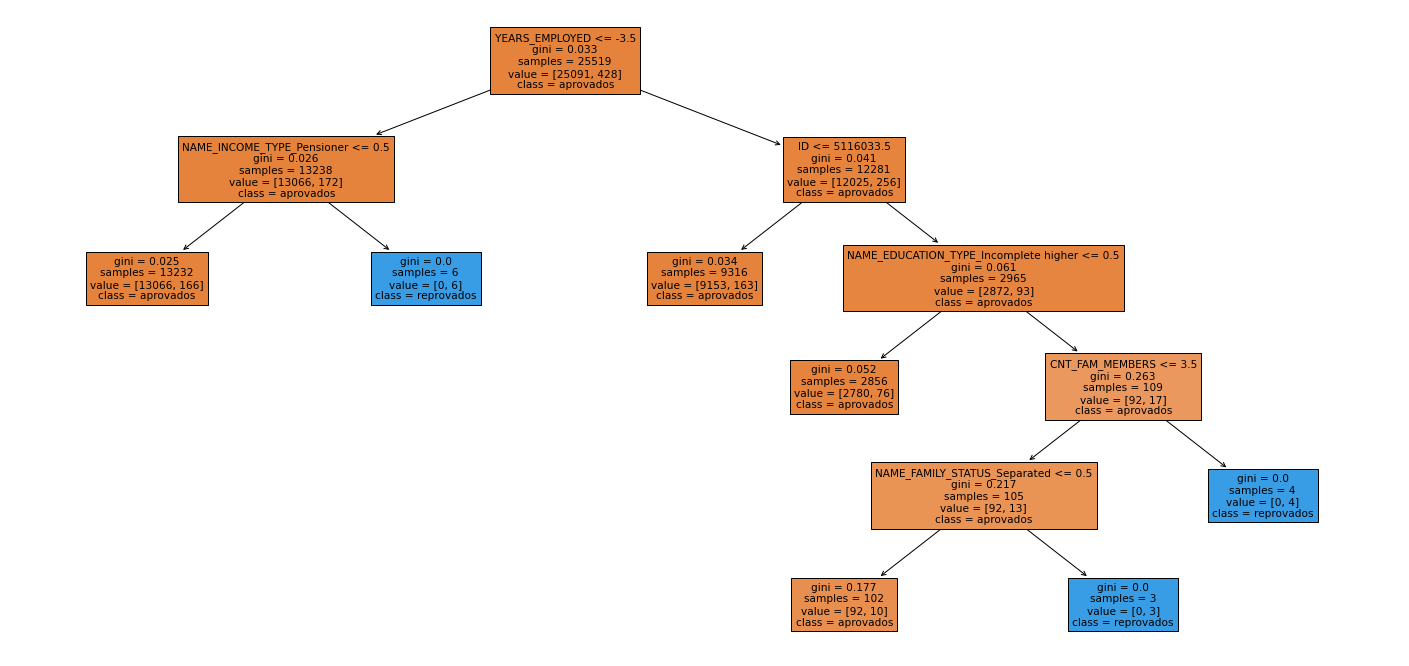

In [45]:
#Plotagem da ávore de decisão para o Modelo 1
plt.figure(figsize = (25, 12))
plot_tree(clf_podada_1,
          filled = True,
          class_names = ['aprovados', 'reprovados'],
          feature_names = x_train.columns);

#### 4.3.2 Modelo 2 - Valor de alpha que cria uma árvore de decisão que generaliza melhor os dados

In [46]:
#Criando uma árvore de decisão para ccp_alpha igual a 0.00020
clf_podada_2 = DecisionTreeClassifier(random_state = 50, ccp_alpha = 0.00020)
clf_podada_2 = clf_podada_2.fit(x_train, y_train)

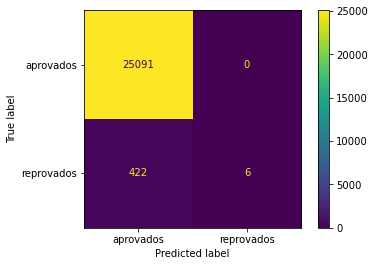

In [47]:
#Visualização da matriz de confusão para o Modelo 2
plot_confusion_matrix(clf_podada_2, x_train, y_train, display_labels = ['aprovados', 'reprovados']);

In [48]:
#Acurácia na base de treinamento para o Modelo 2
y_hat_train = clf_podada_2.predict(x_train)
accuracy_score(y_train, y_hat_train)

0.9834633018535209

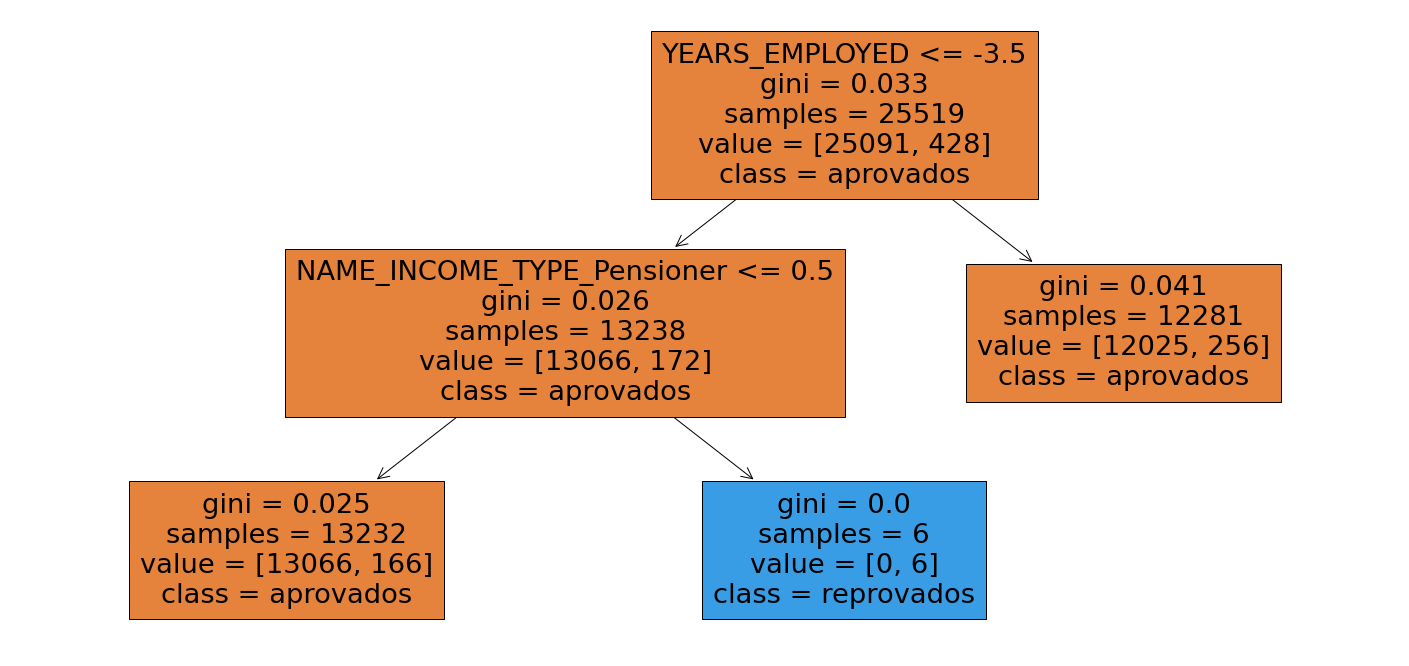

In [49]:
#Plotagem da ávore de decisão para o Modelo 2
plt.figure(figsize = (25, 12))
plot_tree(clf_podada_2,
          filled = True,
          class_names = ['aprovados', 'reprovados'],
          feature_names = x_train.columns);

#### 4.3.3 Modelo 3 - Generalizando ainda mais os dados

In [50]:
#Criando uma árvore de decisão para ccp_alpha igual a 0.000245
clf_podada_3 = DecisionTreeClassifier(random_state = 50, ccp_alpha = 0.000245)
clf_podada_3 = clf_podada_3.fit(x_train, y_train)

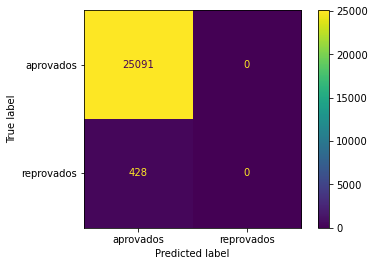

In [51]:
#Visualização da matriz de confusão para o Modelo 3
plot_confusion_matrix(clf_podada_3, x_train, y_train, display_labels = ['aprovados', 'reprovados']);

In [52]:
#Acurácia na base de treinamento para o Modelo 3
y_hat_train = clf_podada_3.predict(x_train)
accuracy_score(y_train, y_hat_train)

0.9832281829225283

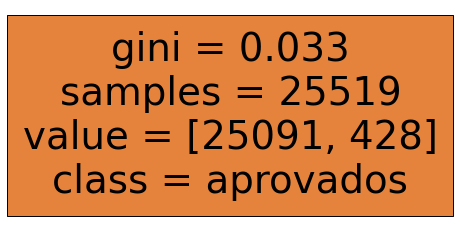

In [53]:
#Plotagem da ávore de decisão para o Modelo 3
plt.figure(figsize = (8, 4))
plot_tree(clf_podada_3,
          filled = True,
          class_names = ['aprovados', 'reprovados'],
          feature_names = x_train.columns);

### 4.4 Avaliação dos modelos no conjunto de teste

#### 4.4.1 Visualização da matriz de confusão para a base de teste.

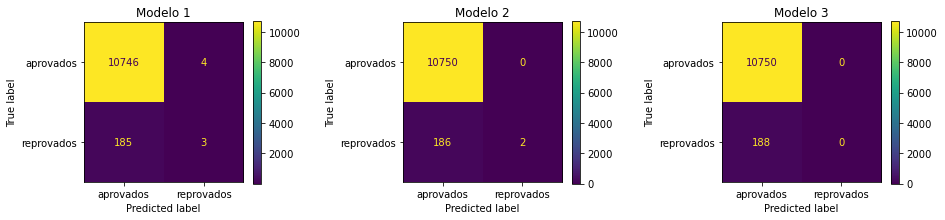

In [56]:
#Vizualização da matriz de confusão para cada modelo
fig, ax = plt.subplots(1, 3, figsize = (15, 3))

clfs_pos_poda = [clf_podada_1, clf_podada_2, clf_podada_3]

for i in range(3):
    plot_confusion_matrix(estimator = clfs_pos_poda[i],
                          ax = ax[i],
                          X = x_test, 
                          y_true = y_test, 
                          display_labels = ['aprovados', 'reprovados'])
    ax[i].set_title(f'Modelo {i+1}')

plt.subplots_adjust(wspace = 0.6)

#### 4.4.2 Comparação da acurácia da base de treino e de teste para cada modelo 

In [57]:
train_accuracy = [clf.score(x_train, y_train) for clf in clfs_pos_poda]
test_accuracy = [clf.score(x_test, y_test) for clf in clfs_pos_poda]
pd.DataFrame({'Treino': train_accuracy, 'Teste': test_accuracy}, 
             index = ['Modelo 1', 'Modelo 2', 'Modelo 3'])

,Treino,Teste
Modelo 1,0.983738,0.982721
Modelo 2,0.983463,0.982995
Modelo 3,0.983228,0.982812


### 4.5 Pré-proda (*pre pruning*) de uma nova árvore de decisão na base completa

In [58]:
clf_pre_pruning = DecisionTreeClassifier(min_samples_leaf = 5, max_depth = 10, random_state = 123)
clf_pre_pruning = clf_pre_pruning.fit(x, y)

0.984200565049236

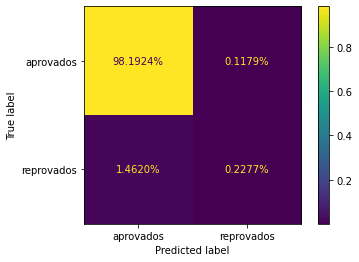

In [59]:
plot_confusion_matrix(clf_pre_pruning, 
                      x, 
                      y, 
                      display_labels = ['aprovados', 'reprovados'],
                      normalize = 'all', 
                     values_format = ".4%");
y_hat = clf_pre_pruning.predict(x)
accuracy_score(y, y_hat)

In [60]:
#Proporção de proponentes classificados como mau pelo modelo
prop = sum(y_hat)/len(y_hat)
vprop = sum(y)/len(y)
print(f'Proporção de proponentes classificados como mau pelo modelo: {prop:.4%}')
print(f'Verdadeira proporção de proponentes classificados como mau: {vprop:.4%}')

Proporção de proponentes classificados como mau pelo modelo: 0.3456%
Verdadeira proporção de proponentes classificados como mau: 1.6897%


### 4.6 Modelo que avalia todos os contratos como "bons"

In [61]:
#Criando um vetor de mesma dimensão de do vetor target com todos os valores iguais a 1
v = np.full(shape = y.shape, fill_value = 0)
#Acurácia caso todos os contratos sejam avaliados como bons
acc = sum(v == y)/len(v)
print(f'Acurácia de um modelo que classifica todos os contratos como bons: {acc:.4%}')

Acurácia de um modelo que classifica todos os contratos como bons: 98.3103%


---

## Etapa 5 Crisp-DM: Avaliação dos resultados
A etapa final do CRISP. Neste casp, a nossa avaliação termina com a acurácia. Mas em problemas futuros aprofundaremos mais - a ideia seria avaliar o impacto do uso do modelo no negócio, ou seja, o quanto o resultado financeiro melhora em detrimento da utilização do modelo.

Como um exemplo simples, considere que um cliente bom pagador deixa (em média) 5 '*dinheiros*' de lucro, e um mau pagador deixa (em média) 100 '*dinheiros*' de prejuízo.

de acordo com a matriz de confusão:

| Decisão   | lucro dos bons    | lucro dos maus | total  |
| --------- |:-----------------:|:--------------:| ------:|
| Aprovador | 4037 x 5          | 72 x (-100)    | 12.985 |
| Reprovar  |  31 x 5           | 23 x (-100)    | -2.145 |

Estariamos evitando, portanto, um prejuízo de -2.145 '*dinheiros*' - o que na prática significa um aumento no lucro.

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor de crédito que toma as decisões com algum nível de automação - tipicamente aprovando automaticamente clientes muito bons, negando automaticamente clientes muito ruins, e enviando os intermediários para análise manual.

---